In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [ ]:
df = pd.read_csv("/content/California Wildfire Damage.csv")

In [ ]:
df.shape

(100, 11)

In [ ]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes:

In [ ]:
print("\nSample Data:")
print(df.head())


Sample Data:
  Incident_ID        Date       Location  Area_Burned (Acres)  \
0     INC1000  2020-11-22  Sonoma County                14048   
1     INC1001  2021-09-23  Sonoma County                33667   
2     INC1002  2022-02-10  Shasta County                26394   
3     INC1003  2021-05-17  Sonoma County                20004   
4     INC1004  2021-09-22  Sonoma County                40320   

   Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged  Injuries  \
0              763                   474               235        70   
1             1633                     4               263       100   
2              915                   291                31        50   
3             1220                   128                34        28   
4              794                   469               147         0   

   Fatalities  Estimated_Financial_Loss (Million $)           Cause  
0          19                               2270.57       Lightning  
1           2         

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Area_Burned (Acres)  Homes_Destroyed  Businesses_Destroyed  \
count           100.000000       100.000000            100.000000   
mean          26531.460000       941.890000            251.570000   
std           14282.123824       543.019967            138.317761   
min             357.000000        18.000000              4.000000   
25%           15916.250000       501.000000            134.750000   
50%           25618.000000       908.500000            256.500000   
75%           39775.000000      1401.750000            371.000000   
max           49653.000000      1968.000000            493.000000   

       Vehicles_Damaged    Injuries  Fatalities  \
count        100.000000  100.000000  100.000000   
mean         150.330000   42.040000    9.930000   
std           88.471197   29.201467    5.682251   
min            5.000000    0.000000    0.000000   
25%           70.750000   16.000000    5.000000   
50%          150.500000   37.000000   10.000000   


In [ ]:
# Checking categorical features distribution
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")


Unique values in Incident_ID: 100

Unique values in Date: 97

Unique values in Location: 10

Unique values in Cause: 3


In [ ]:
# Check unique values in categorical variables
print("\nUnique Fire Causes:")
print(df['Cause'].value_counts())


Unique Fire Causes:
Cause
Human Activity    38
Lightning         31
Unknown           31
Name: count, dtype: int64


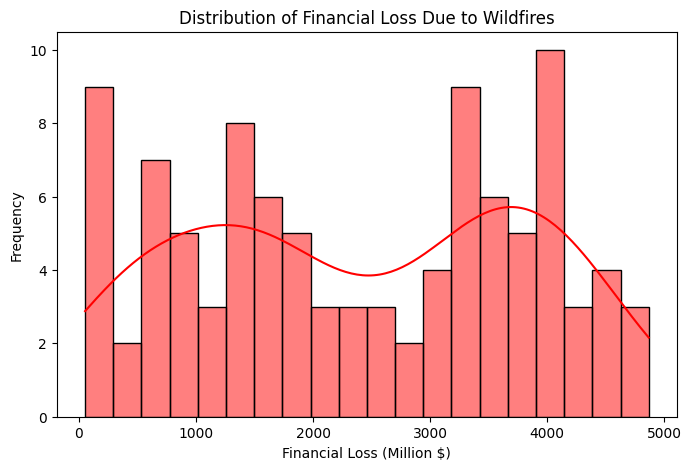

In [ ]:
# Financial Loss Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Estimated_Financial_Loss (Million $)'], bins=20, kde=True, color='red')
plt.title('Distribution of Financial Loss Due to Wildfires')
plt.xlabel('Financial Loss (Million $)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-987b7ae810f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Cause'], order=df['Cause'].value_counts().index, palette="coolwarm")


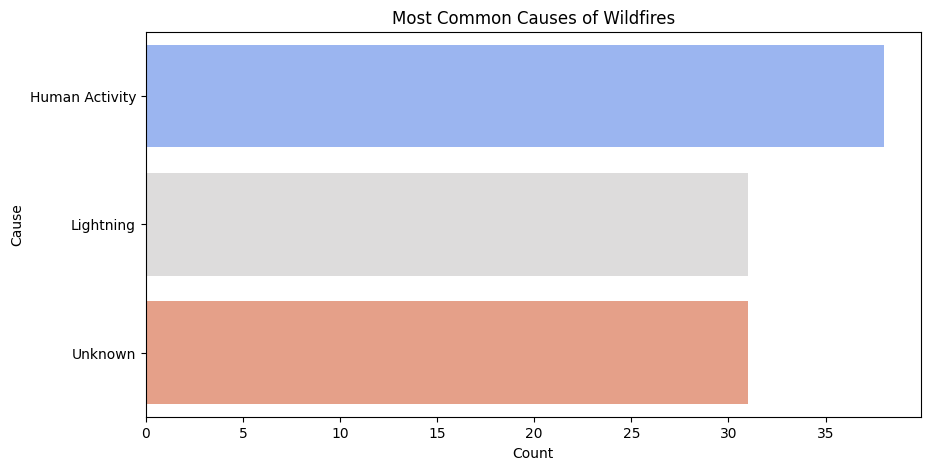

In [ ]:
# Wildfire Causes Frequency
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Cause'], order=df['Cause'].value_counts().index, palette="coolwarm")
plt.title('Most Common Causes of Wildfires')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()

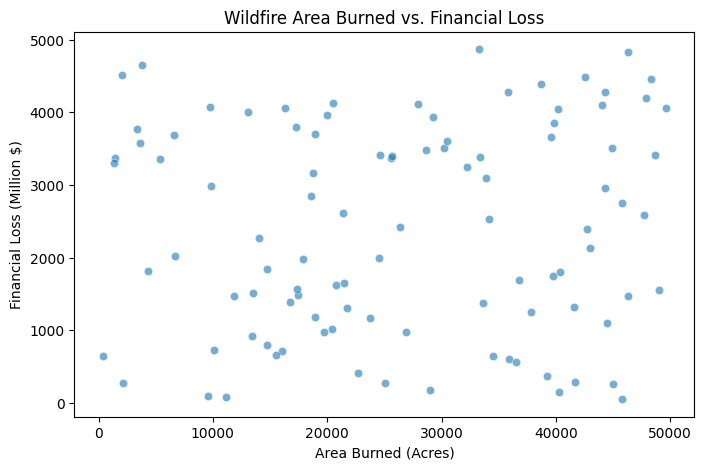

In [ ]:
# Scatter Plot: Area Burned vs. Financial Loss
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Area_Burned (Acres)'], y=df['Estimated_Financial_Loss (Million $)'], alpha=0.6)
plt.title('Wildfire Area Burned vs. Financial Loss')
plt.xlabel('Area Burned (Acres)')
plt.ylabel('Financial Loss (Million $)')
plt.show()

<ipython-input-13-fc4f90ff416a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cause'], y=df['Estimated_Financial_Loss (Million $)'], palette="Set2")


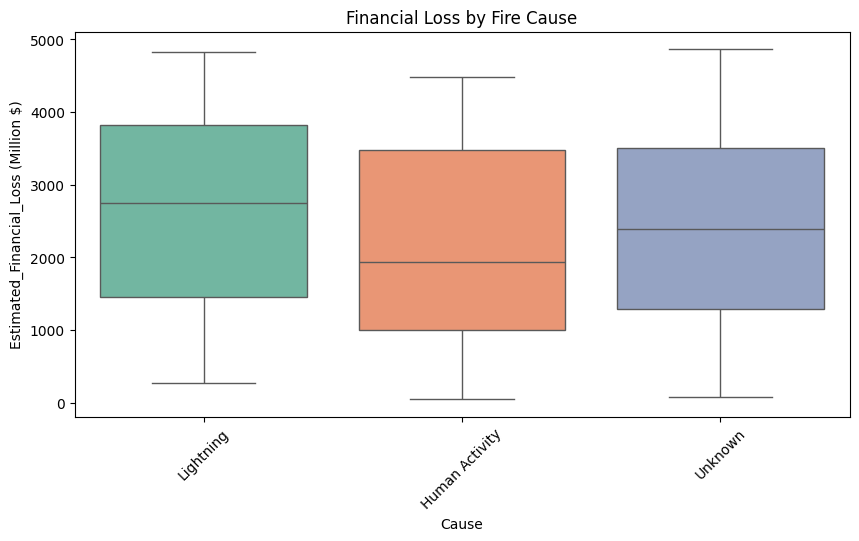

In [ ]:
# Boxplot: Cause vs. Financial Loss
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Cause'], y=df['Estimated_Financial_Loss (Million $)'], palette="Set2")
plt.xticks(rotation=45)
plt.title('Financial Loss by Fire Cause')
plt.show()


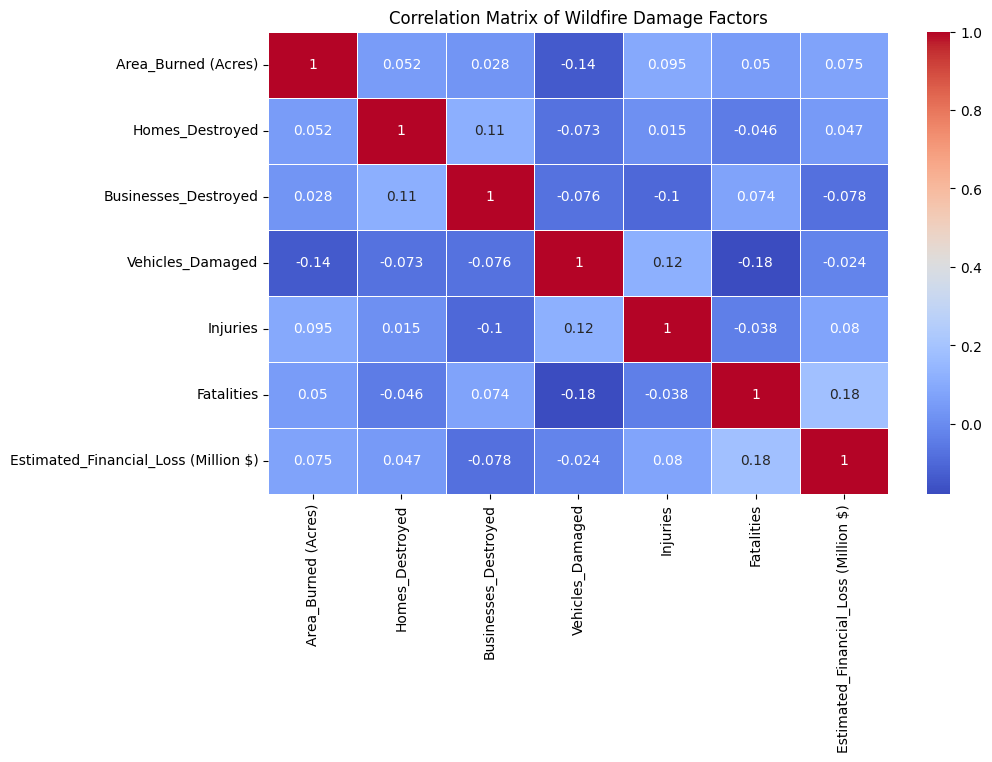

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  # Excludes non-numeric columns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Wildfire Damage Factors')
plt.show()

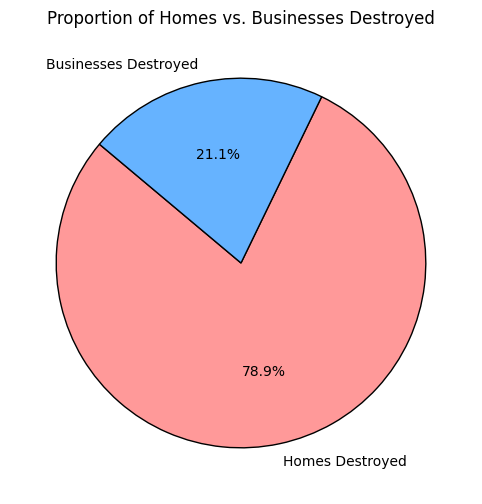

In [ ]:
labels = ['Homes Destroyed', 'Businesses Destroyed']
sizes = [df['Homes_Destroyed'].sum(), df['Businesses_Destroyed'].sum()]
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Homes vs. Businesses Destroyed")
plt.show()

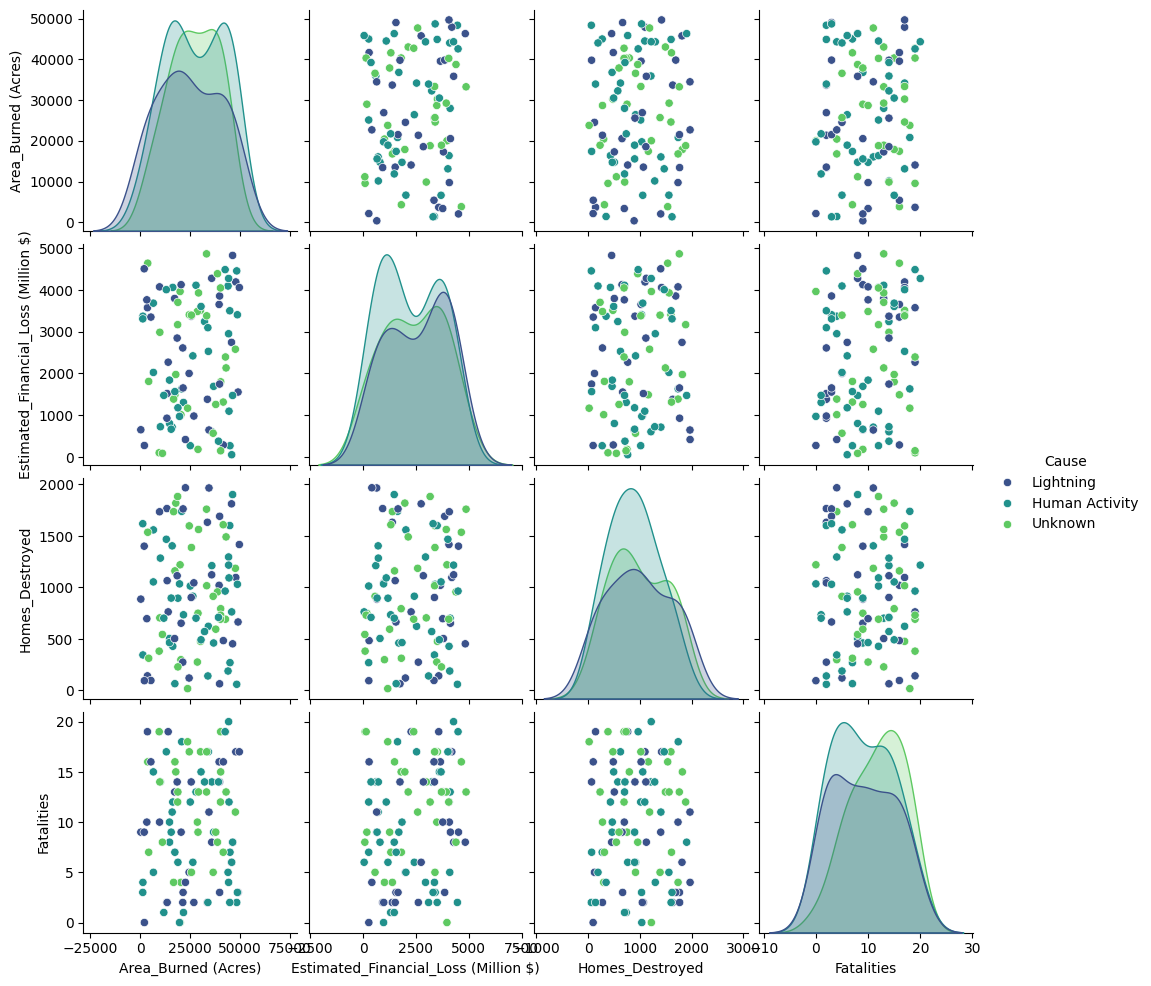

In [ ]:
sns.pairplot(df, vars=['Area_Burned (Acres)', 'Estimated_Financial_Loss (Million $)', 'Homes_Destroyed', 'Fatalities'], hue="Cause", palette="viridis")
plt.show()


<ipython-input-17-855e24a1fbe3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="crest")


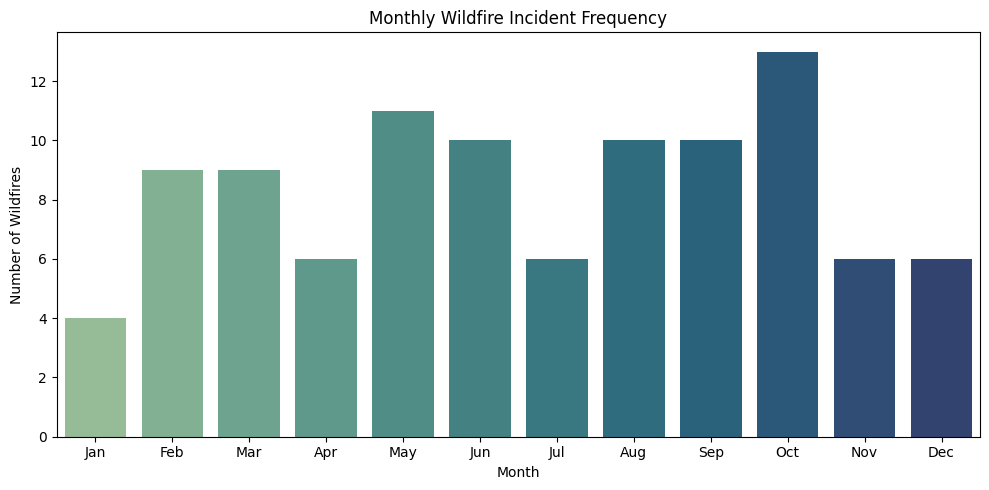

In [ ]:
# Convert 'Date' column to datetime format (if not already done)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month from date
df['Month'] = df['Date'].dt.month

# Count number of incidents per month
monthly_counts = df['Month'].value_counts().sort_index()

# Bar chart of wildfire frequency by month
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="crest")

# Customizing the plot
plt.title("Monthly Wildfire Incident Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Wildfires")
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

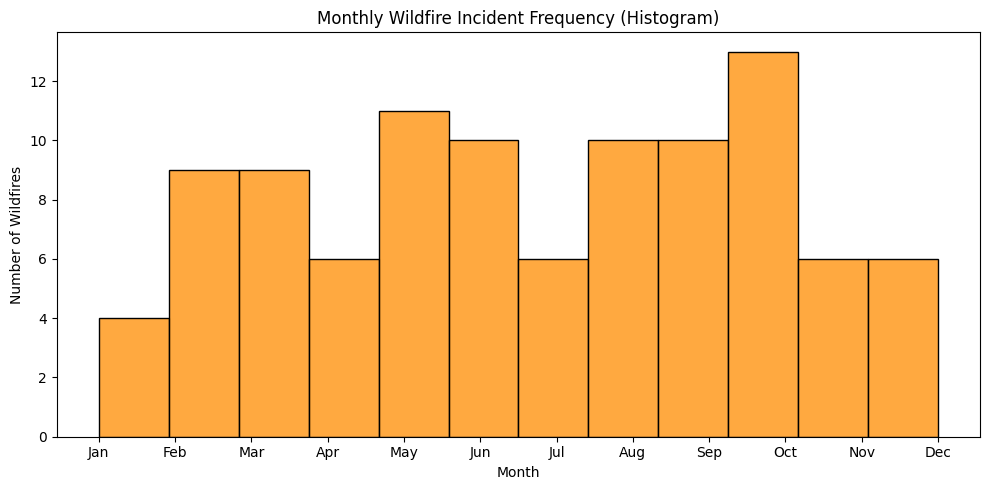

In [ ]:
# Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month
df['Month'] = df['Date'].dt.month

# Histogram of wildfire frequency by month
plt.figure(figsize=(10, 5))
sns.histplot(df['Month'], bins=12, kde=False, color='darkorange')

# Customizing the plot
plt.title("Monthly Wildfire Incident Frequency (Histogram)")
plt.xlabel("Month")
plt.ylabel("Number of Wildfires")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


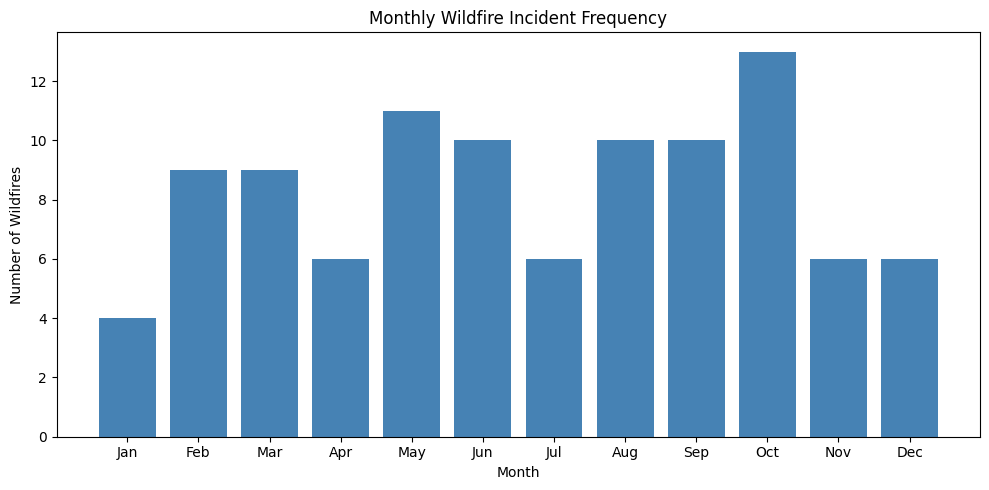

In [ ]:
# Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month
df['Month'] = df['Date'].dt.month

# Count wildfires per month
monthly_counts = df['Month'].value_counts().sort_index()

# Simple bar chart with single color
plt.figure(figsize=(10, 5))
plt.bar(monthly_counts.index, monthly_counts.values, color='steelblue')

# Customize plot
plt.title("Monthly Wildfire Incident Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Wildfires")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Aggregate financial loss over time
df_time = df.groupby('Date').sum().reset_index()

# Create animated line chart
fig = px.line(df_time, x='Date', y='Estimated_Financial_Loss (Million $)',
              title="📈 Wildfire Financial Loss Over Time", markers=True)
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create sunburst chart
fig = go.Figure(go.Sunburst(
    labels=["Wildfires", "Natural Causes", "Human Causes", "Lightning", "Arson", "Accidental", "Equipment Failure"],
    parents=["", "Wildfires", "Wildfires", "Natural Causes", "Human Causes", "Human Causes", "Human Causes"],
    values=[100, 40, 60, 20, 30, 20, 10],
    branchvalues="total",
    marker=dict(colors=["#FF5733", "#FFC300", "#DAF7A6", "#900C3F", "#581845", "#C70039", "#FF5733"])
))

fig.update_layout(title=" Sunburst Chart: Breakdown of Wildfire Causes")
fig.show()


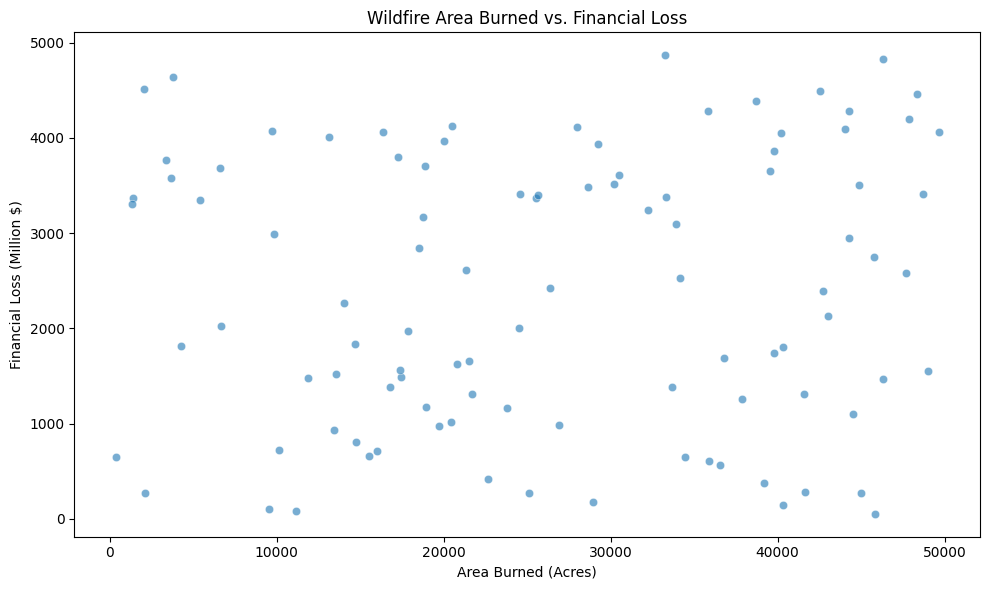

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_Burned (Acres)', y='Estimated_Financial_Loss (Million $)', alpha=0.6)
plt.title("Wildfire Area Burned vs. Financial Loss")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Financial Loss (Million $)")
plt.tight_layout()
plt.show()

In [ ]:
# Drop identifier column and handle date
df = df.drop(columns=['Incident_ID'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df = df.drop(columns=['Date'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Define features and target
X = df.drop(columns=['Estimated_Financial_Loss (Million $)'])
y = df['Estimated_Financial_Loss (Million $)']

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [ ]:
# Create pipeline with Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Log-transform the target
y_log = np.log1p(y)

# Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit pipeline
rf_pipeline.fit(X_train, y_train_log)

# Extract trained model
rf_model = rf_pipeline.named_steps['regressor']
rf_model.fit(preprocessor.transform(X_train), y_train_log)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred_log = rf_pipeline.predict(X_test)

# Inverse the log transformation
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# Evaluate
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 1386.95
Root Mean Squared Error (RMSE): 1617.47
R² Score: -0.345


<ipython-input-42-d7fc66e77c52>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




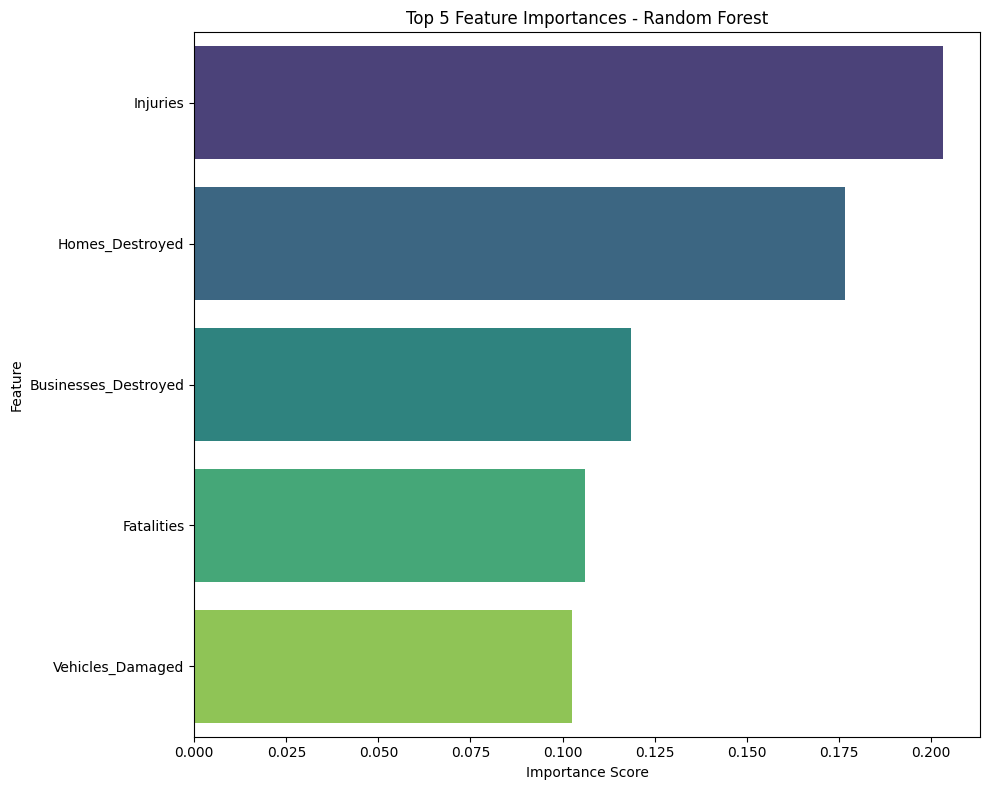

In [ ]:
# Get feature names
feature_names = preprocessor.transformers_[0][2] + \
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Create and sort importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 5 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

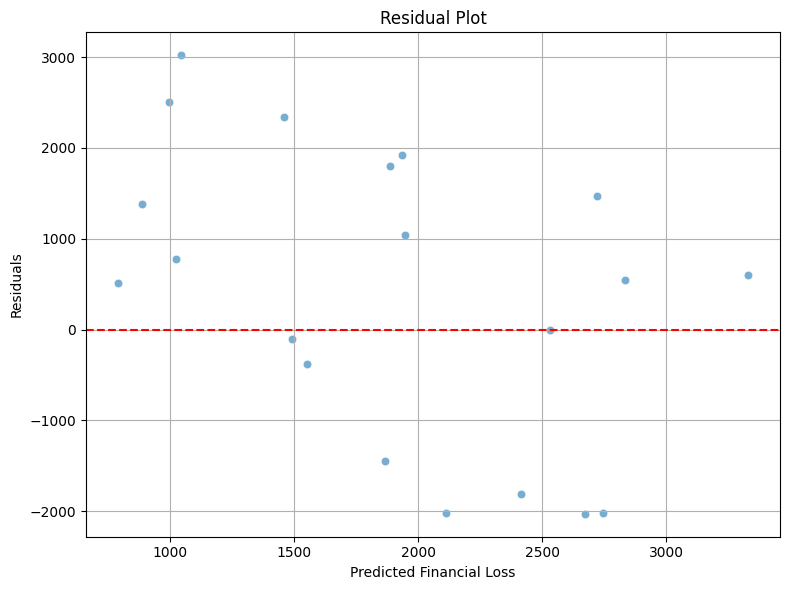

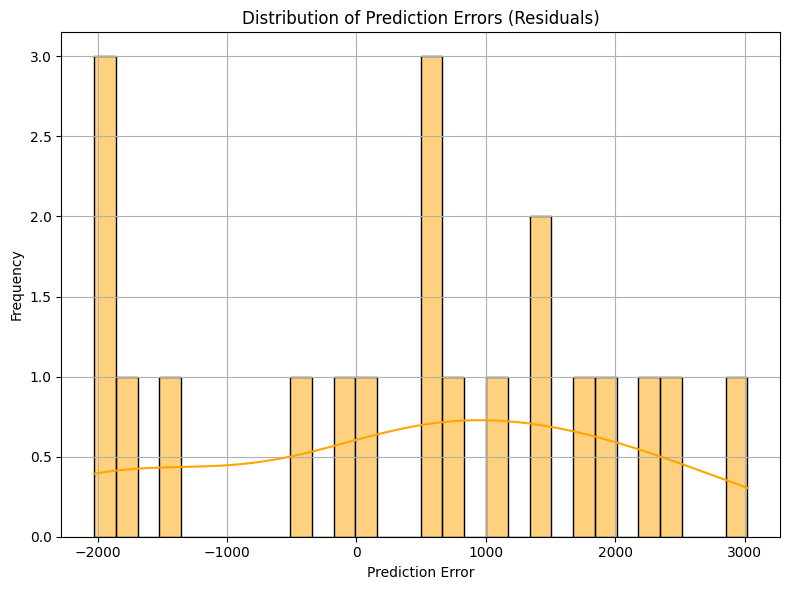

In [ ]:
# Residuals and Error Distribution Plots
residuals = y_test_actual - y_pred

# Plot 1: Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Financial Loss')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Error Distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


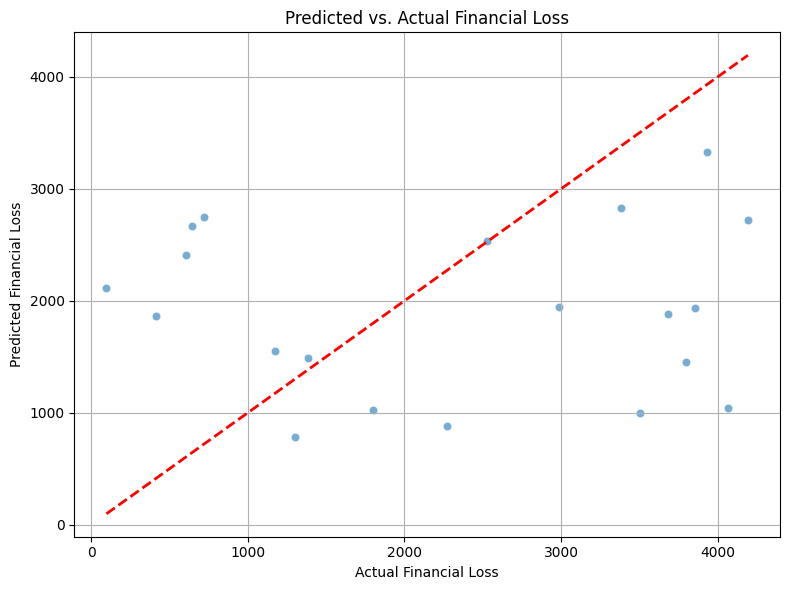

<ipython-input-45-cb744722e5a6>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




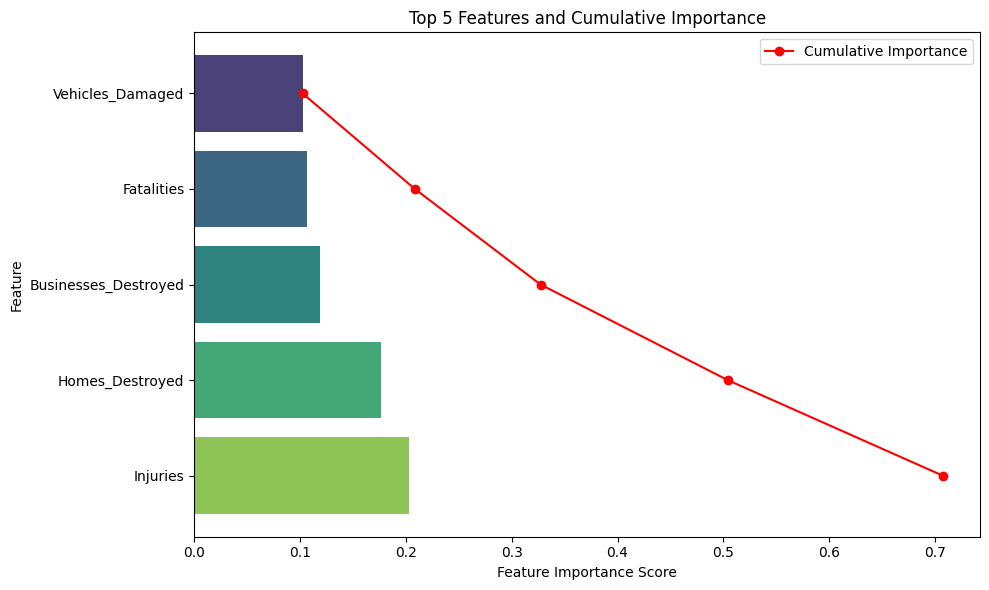

In [ ]:
# Additional Plot 1: Predicted vs Actual values with error bars
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_pred, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=2)
plt.xlabel('Actual Financial Loss')
plt.ylabel('Predicted Financial Loss')
plt.title('Predicted vs. Actual Financial Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Plot 2: Feature importance cumulative bar
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=True)
importances_df_sorted['Cumulative'] = importances_df_sorted['Importance'].cumsum()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df_sorted, palette='viridis')
plt.plot(importances_df_sorted['Cumulative'], importances_df_sorted['Feature'], color='red', marker='o', label='Cumulative Importance')
plt.xlabel('Feature Importance Score')
plt.title('Top 5 Features and Cumulative Importance')
plt.legend()
plt.tight_layout()
plt.show()
